# Investigating WeRateDogs‘s Tweeter account
by modhi alhabradi

## Installing needed packages and tweepy

In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## 1. Data Gathering

In [2]:
# Supplied file
tw_archive = pd.read_csv('twitter-archive-enhanced.csv',sep=',')
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Requesting tweet image predictions

with open('image_predictions.tsv' , 'wb') as file:
    image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    file.write(image_predictions.content)

In [3]:
# Reading image predictions
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [62]:
# collecting data using API  

collected =[]
not_collected = [] # to avoid error/exception messages

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(tw_archive['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            collected.append(tweet_id)
        except Exception as e:
            not_collected.append(tweet_id)


In [4]:
#Reading JSON content as pandas dataframe
tweet_status = pd.read_json('tweet-json.txt',encoding='utf-8', lines = True)


In [8]:
tweet_status.sample(6)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
692,NaN,NaN,2016-10-14 16:13:10,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 786963058530906112, 'id_str'...",29725,False,This is Rory. He's got an interview in a few m...,NaN,...,0.0,NaN,NaN,NaN,9327,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2322,NaN,NaN,2015-11-17 01:02:40,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666421153020444674, 'id_str'...",327,False,*internally screaming* 12/10 https://t.co/YMcr...,NaN,...,0.0,NaN,NaN,NaN,118,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
572,NaN,NaN,2016-11-22 20:58:07,"[0, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 801167887901724672, 'id_str'...",27386,False,This is Milo. I would do terrible things for M...,NaN,...,0.0,NaN,NaN,NaN,6961,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2070,NaN,NaN,2015-11-29 23:30:32,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671109008019742721, 'id_str'...",1225,False,This is Toby. He asked for chocolate cake for ...,NaN,...,0.0,NaN,NaN,NaN,478,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2010,NaN,NaN,2015-12-03 02:21:48,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672239273467359232, 'id_str'...",953,False,This is Ridley. He doesn't know how to couch. ...,NaN,...,0.0,NaN,NaN,NaN,347,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1943,NaN,NaN,2015-12-07 03:34:14,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673707042180341760, 'id_str'...",1177,False,This is Raymond. He's absolutely terrified of ...,NaN,...,0.0,NaN,NaN,NaN,434,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Data Assessment

### Visual assessment

In [15]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
tweet_status

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Programmatic assessment

In [18]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
tw_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
tw_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
tw_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
tweet_status.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [28]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [29]:
tweet_status.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


### Assessments for quality:

### Tw_archive

1- Some columns have huge amount of missing values, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". Since I don't need in_reply and retweet data in this project, I perfer to delete those columns directly.<br/>
2-The varaible "expanded_urls" also has few missing values, which means some records had no images. Any ratings without images should not be taking into account.<br/>
3-Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "name" to "dog_name".<br/>
4- Optimize the source contents for human reading habit; change the long url links to certain words.<br/>
5- Multiple cases where numerator of rating > 10. These entries will be assessed and removed if not authentic.<br/>
6-Multiple cases of where the numerator of rating < 10. These entries will be removed.<br/> 


### image_predictions

1-The "p1" and "p1_conf" columns will be renamed with more explanatory titles.<br/>
2-The column "jpg_url" will be removed since url data is already contained in the twitter archive data.

### tweet_status

1- Drop unneeded columns<br/>
2-Rename the column id to be tweet_id to facilitate merging<br/>


## Assessments for tidiness:

1-The columns (doggo, floofer, pupper and puppo) do not need to be separated. Each dog ‎will be classified as one of these classifications. It is better to create one column for dog ‎classification that contains the values (doggo, floofer, pupper and puppo).<br/>
2-Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.

# Data Cleaning

In [2]:
# Reading gathered files
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
tweet_status = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [3]:
# create a cleaned dataframe from the archive
cleaned_archive = tw_archive.copy()

In [4]:
# test
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
# Define: Select rows wehre the column "in_reply_to_status_id" is Null (this will exclude all the retweets)

#Code
cleaned_archive = cleaned_archive[cleaned_archive['in_reply_to_status_id'].isnull()]

In [6]:

# Define: Dropping unneded (missing too much values) columns using drop function.

# code
cleaned_archive = cleaned_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [7]:
# Test
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


In [8]:
#Define
# drop the 59 records without images 
cleaned_archive= cleaned_archive.dropna(subset = ['expanded_urls'])

In [9]:
# Define
#  Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", 
#    "text" to "tweet_text", "name" to "dog_name",

# Code
new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text',\
              'name': 'dog_name'}


cleaned_archive.rename(columns=new_names, inplace=True)

In [10]:
cleaned_archive.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# simpfy the source contexts
       
cleaned_archive['source'] = cleaned_archive['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
cleaned_archive['source'] =  cleaned_archive['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
cleaned_archive['source'] =  cleaned_archive['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
cleaned_archive['source'] =  cleaned_archive['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

# change the type of source to category for preparing later visualization
cleaned_archive['source'] = cleaned_archive['source'].astype('category')

In [12]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2274 non-null int64
tweet_timestamp       2274 non-null object
source                2274 non-null category
tweet_text            2274 non-null object
expanded_urls         2274 non-null object
rating_numerator      2274 non-null int64
rating_denominator    2274 non-null int64
dog_name              2274 non-null object
doggo                 2274 non-null object
floofer               2274 non-null object
pupper                2274 non-null object
puppo                 2274 non-null object
dtypes: category(1), int64(3), object(8)
memory usage: 215.6+ KB


In [13]:
cleaned_archive.source.value_counts()

Twitter for iphone     2140
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

In [14]:
cleaned_archive.rating_denominator.value_counts()

10     2256
11        3
50        3
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [15]:
cleaned_archive.rating_numerator.value_counts()

12      543
10      453
11      451
13      331
9       155
8       102
7        53
14       48
5        35
6        32
3        19
4        16
2         9
1         6
75        2
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
15        1
27        1
45        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [16]:
# filter the wrong rating_denominator values

df1 = cleaned_archive[cleaned_archive['rating_denominator'] != 10]

df1[['tweet_id','tweet_text','rating_numerator','rating_denominator']].values

array([[820690176645140481,
        'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        84, 70],
       [810984652412424192,
        'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
        24, 7],
       [775096608509886464,
        'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
        9, 11],
       [758467244762497024,
        'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
        165, 150],
       [740373189193256964,
        'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
        9, 11],
       [731156023742988288,
        'Say hello to this unbelievably well behaved squad of 

In [17]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

cleaned_archive.loc[cleaned_archive.tweet_id == 740373189193256964, ['rating_denominator']] = 10
cleaned_archive.loc[cleaned_archive.tweet_id == 722974582966214656, ['rating_denominator']] = 10
cleaned_archive.loc[cleaned_archive.tweet_id == 716439118184652801, ['rating_denominator']] = 10
cleaned_archive.loc[cleaned_archive.tweet_id == 682962037429899265, ['rating_denominator']] = 10
cleaned_archive.loc[cleaned_archive.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [18]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

cleaned_archive.loc[cleaned_archive.tweet_id == 740373189193256964, ['rating_numerator']] = 14
cleaned_archive.loc[cleaned_archive.tweet_id == 722974582966214656, ['rating_numerator']] = 13
cleaned_archive.loc[cleaned_archive.tweet_id == 716439118184652801, ['rating_numerator']] = 11
cleaned_archive.loc[cleaned_archive.tweet_id == 682962037429899265, ['rating_numerator']] = 10
cleaned_archive.loc[cleaned_archive.tweet_id == 666287406224695296, ['rating_numerator']] = 9

In [19]:
#test 
cleaned_archive.loc[cleaned_archive.tweet_id == 740373189193256964]

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iphone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


In [20]:
# Define: exclude all extreme and zero values from the numertor and denuminator

#Code
cleaned_archive = cleaned_archive[cleaned_archive['rating_numerator'] != 0 ]
cleaned_archive = cleaned_archive[cleaned_archive['rating_denominator'] == 10 ]
cleaned_archive = cleaned_archive[cleaned_archive['rating_numerator'] <= 20 ]
#cleaned_archive = cleaned_archive[cleaned_archive['rating_denominator'] < 20 ]

In [21]:
# test
len(cleaned_archive[cleaned_archive['rating_numerator'] > 20 ])

0

In [22]:
cleaned_archive.rating_numerator.value_counts()

12    543
10    454
11    452
13    332
9     154
8     102
7      52
14     49
5      35
6      32
3      19
4      15
2       9
1       5
15      1
Name: rating_numerator, dtype: int64

In [23]:
cleaned_archive.rating_denominator.value_counts()

10    2254
Name: rating_denominator, dtype: int64

### image_predictions 

In [24]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
cleaned_images = image_predictions.copy()

In [26]:
#Define 
# change the column names
cleaned_images.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [27]:
#test
cleaned_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'first_confidence', 'first_dog', 'second_prediction',
       'second_confidence', 'second_dog', 'third_prediction',
       'third_confidence', 'third_dog'],
      dtype='object')

In [28]:
cleaned_images.drop('jpg_url', inplace=True, axis=1)

In [29]:
cleaned_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id             2075 non-null int64
img_num              2075 non-null int64
first_prediction     2075 non-null object
first_confidence     2075 non-null float64
first_dog            2075 non-null bool
second_prediction    2075 non-null object
second_confidence    2075 non-null float64
second_dog           2075 non-null bool
third_prediction     2075 non-null object
third_confidence     2075 non-null float64
third_dog            2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


### tweet_status

In [30]:
cleaned_status = tweet_status.copy()

In [31]:
cleaned_status.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [32]:
# Define: filter/select needed columns
# Code
cleaned_status = cleaned_status.filter(['id','favorite_count','retweet_count'] )

In [33]:
# test
cleaned_status.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Assessments for tidiness:

In [34]:
# Define: use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

# Code
cleaned_archive.loc[cleaned_archive['doggo'] == 'doggo', 'dog_class'] = 'doggo'
cleaned_archive.loc[cleaned_archive['floofer'] == 'floofer', 'dog_class'] = 'floofer'
cleaned_archive.loc[cleaned_archive['pupper'] == 'pupper', 'dog_class'] = 'pupper'
cleaned_archive.loc[cleaned_archive['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [35]:
# test
cleaned_archive.sample(8)

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_class
1877,675109292475830276,2015-12-11 00:26:12 +0000,Twitter for iphone,C'mon guys. We've been over this. We only rate...,https://twitter.com/dog_rates/status/675109292...,9,10,a,None,None,None,None,NaN
82,876838120628539392,2017-06-19 16:24:33 +0000,Twitter for iphone,This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None,pupper
2243,667902449697558528,2015-11-21 03:08:47 +0000,Twitter for iphone,This is Cleopatricia. She is a northern Paperb...,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,None,None,None,None,NaN
583,800188575492947969,2016-11-20 04:06:37 +0000,Twitter for iphone,RT @dog_rates: This is Bo. He's a Benedoop Cum...,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None,pupper
649,792913359805018113,2016-10-31 02:17:31 +0000,Twitter for iphone,Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None,NaN
2113,670434127938719744,2015-11-28 02:48:46 +0000,Twitter for iphone,Meet Hank and Sully. Hank is very proud of the...,https://twitter.com/dog_rates/status/670434127...,11,10,Hank,None,None,None,None,NaN
196,854732716440526848,2017-04-19 16:25:34 +0000,Twitter for iphone,This is Marlee. She fetched a flower and immed...,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,None,None,None,None,NaN
1111,733482008106668032,2016-05-20 02:18:32 +0000,Twitter for iphone,"""Ello this is dog how may I assist"" ...10/10 h...",https://twitter.com/dog_rates/status/733482008...,10,10,None,None,None,None,None,NaN


In [36]:
# dropping unneded doggo, floofer, pupper or poppo columns
cleaned_archive = cleaned_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [37]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2254 non-null int64
tweet_timestamp       2254 non-null object
source                2254 non-null category
tweet_text            2254 non-null object
expanded_urls         2254 non-null object
rating_numerator      2254 non-null int64
rating_denominator    2254 non-null int64
dog_name              2254 non-null object
dog_class             370 non-null object
dtypes: category(1), int64(3), object(5)
memory usage: 160.9+ KB


### tweet_status

In [38]:
# Define: rename the column id 

# Code
cleaned_status = cleaned_status.rename(columns={'id':'tweet_id'})

In [39]:
cleaned_status.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Merging documents to form a working dataframe

In [40]:
tweeter_df = pd.merge(cleaned_archive, cleaned_images, how='outer', on=['tweet_id'])

In [41]:
tweeter_df = pd.merge(tweeter_df, cleaned_status, how = 'outer', on=['tweet_id'])

In [42]:
tweeter_df.sample(5)

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_class,img_num,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,favorite_count,retweet_count
1714,677301033169788928,2015-12-17 01:35:24 +0000,Twitter for iphone,This is Juckson. He's totally on his way to a ...,https://twitter.com/dog_rates/status/677301033...,5.0,10.0,Juckson,NaN,1.0,...,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True,1362.0,471.0
709,779377524342161408,2016-09-23 17:50:56 +0000,Twitter for iphone,Have you ever seen such a smol pupper? Portabl...,https://twitter.com/dog_rates/status/779377524...,12.0,10.0,None,pupper,1.0,...,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False,9831.0,3613.0
2118,668496999348633600,2015-11-22 18:31:19 +0000,Twitter for iphone,This is Jo. Jo is a Swedish Queso. Tongue bigg...,https://twitter.com/dog_rates/status/668496999...,8.0,10.0,Jo,NaN,1.0,...,0.412879,True,miniature_pinscher,0.161488,True,American_Staffordshire_terrier,0.112495,True,436.0,146.0
877,756288534030475264,2016-07-22 00:43:32 +0000,Twitter for iphone,Here's a heartwarming scene of a single father...,https://twitter.com/dog_rates/status/756288534...,12.0,10.0,None,NaN,3.0,...,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False,28519.0,15071.0
1508,687312378585812992,2016-01-13 16:36:55 +0000,Twitter for iphone,"""You got any games on your phone"" 7/10 for inv...",https://twitter.com/dog_rates/status/687312378...,7.0,10.0,None,pupper,1.0,...,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True,4777.0,2146.0


In [43]:
tweeter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2356 non-null int64
tweet_timestamp       2254 non-null object
source                2254 non-null category
tweet_text            2254 non-null object
expanded_urls         2254 non-null object
rating_numerator      2254 non-null float64
rating_denominator    2254 non-null float64
dog_name              2254 non-null object
dog_class             370 non-null object
img_num               2075 non-null float64
first_prediction      2075 non-null object
first_confidence      2075 non-null float64
first_dog             2075 non-null object
second_prediction     2075 non-null object
second_confidence     2075 non-null float64
second_dog            2075 non-null object
third_prediction      2075 non-null object
third_confidence      2075 non-null float64
third_dog             2075 non-null object
favorite_count        2354 non-null float64
retweet_count         2354

In [44]:
# Saving df as csv
tweeter_df.to_csv('twitter_archive_master.csv')

## Analyze and Visualize

In [45]:
tweeter_df.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_class,img_num,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,1.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,1.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,2.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


## Most Common Dog Category

In [46]:
tweeter_df.dog_class.value_counts()

pupper     251
doggo       80
puppo       29
floofer     10
Name: dog_class, dtype: int64

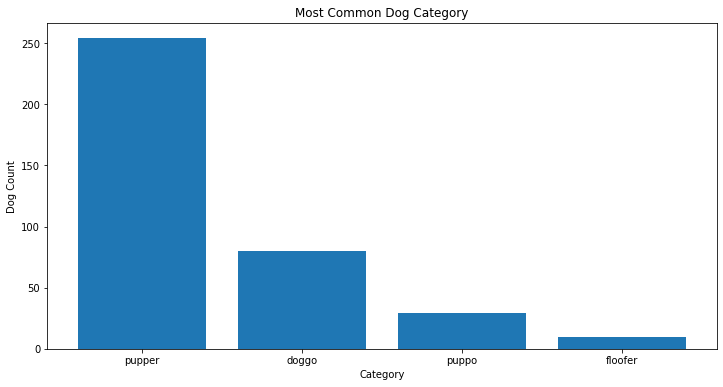

In [47]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [254, 80, 29, 10]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

Similarly, I check the distribution of dog stages. It shows that ‘pupper’ is the most popular dog stage, followed by ‘doggo’ and ‘puppo’. It could be due to the young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there’s huge amount missing data in dog stages, thus the distribution may not reflect the truth.

## The Distribution of Source

Twitter for iphone     2121
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                10
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of Source')

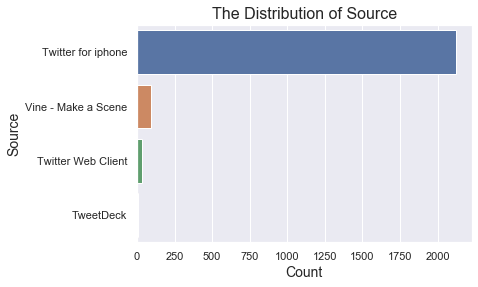

In [48]:
sorted_source = cleaned_archive['source'].value_counts().index
print(cleaned_archive['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = cleaned_archive, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

This plot above shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

### Retweet_count and favorite_count

Text(0.5, 1.0, ' the relationship between Retweet and favorite')

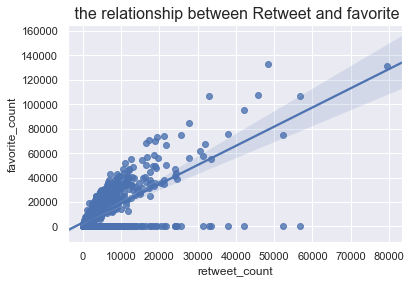

In [49]:
sns.regplot(x="retweet_count", y="favorite_count", data=tweeter_df)
plt.title(' the relationship between Retweet and favorite',fontsize=16)

A reasonable hypothesis is that most popular tweets usually get a large number of retweets and favorite counts. I test the correlation between ‘retweet_count’ and ‘favorite_count’. the plot showing a strong positive relationship between ‘retweet_count’ and ‘favorite_count’. That confirms this hypothesis.

In [50]:
tweeter_df.rating_numerator.describe()

count    2254.000000
mean       10.700089
std         2.126207
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

In [51]:
tweeter_df.first_prediction.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [52]:
tweeter_df.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [53]:
tweeter_df.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

## insight <br/>
The most popular dog type is a "pupper"<br/>
The most popular dog, based on image predictions, is a Golden Retriever<br/>
The median and mean ratings out of ten are 11 and 12.7 respectively<br/>
The median and mean retweet count is 1337 and 2837 respectively <br/>
The median and mean favorite count is 3744 and 8490 respectively <br/>

## Reference<br/>
Twitter API Guide: https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/<br/>

Tweepy documentation: https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf<br/>

WeRateDogs Twitter: https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor<br/>